# PCA Lab II

In [24]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics

%matplotlib inline

## Step 1: Setup the Data

After you've downloaded the data from the repository, go ahead and load it with Pandas

In [4]:
df_airports = pd.read_csv('../../assets/datasets/airport_operations.csv')

In [5]:
df_airports.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data.

In [ ]:
import seaborn as sns
sns.pairplot(df_airports)

## Step 3: Define the Variables

Next, let's define the x and y variables: Airport is going to be our "x" variable

In [6]:
x = df_airports.drop('airport', axis = 1)
y = df_airports['airport']


## Step 4: Covariance Matrix

Then, standardize the x variable for analysis

In [7]:
x = StandardScaler().fit_transform(x)

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [9]:
coveriance_matrix = np.cov(x.T)

eigenValues, eigenVectors = np.linalg.eig(coveriance_matrix)

# Step 5: Eigenpairs

Then, check your eigenvalues and eigenvectors:

In [10]:
print eigenValues
print eigenVectors[:5]

[  6.45349601e+00   4.30952372e+00   1.21824879e+00   7.37875394e-01
   5.10954558e-01   3.49353222e-01   1.66799275e-01   1.20220515e-01
   7.32036815e-02   6.41924376e-02   9.59074587e-03   2.34264664e-03
   1.64364385e-04   7.01306545e-04]
[[-0.05747614  0.05252557  0.80890976 -0.38914338 -0.01517249 -0.40455823
  -0.03918196 -0.01319762  0.14376054 -0.00777298 -0.03107428 -0.02933693
   0.00229607  0.001993  ]
 [ 0.11683294 -0.41190929  0.16980855  0.40257614 -0.12274015 -0.11232074
   0.29026653  0.06082036  0.07665943  0.03325464 -0.02178517  0.02057546
   0.70799524  0.03171276]
 [ 0.1164079  -0.41158191  0.17108429  0.40387107 -0.12540936 -0.10989401
   0.29134664  0.06552886  0.09065779  0.03221664 -0.03615976 -0.02653745
  -0.70372734 -0.03443946]
 [-0.31455588 -0.25353041 -0.11887711 -0.22456082  0.12369052 -0.06827278
   0.05434861  0.32677046  0.00236581  0.32971135 -0.19934018  0.66876199
  -0.03004708  0.2143065 ]
 [-0.37512831 -0.07870829 -0.10089244 -0.0109185   0.1346

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

In [12]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
print eigenPairs[0:5]

[(6.4534960079102319, array([-0.05747614,  0.11683294,  0.1164079 , -0.31455588, -0.37512831,
       -0.31944346,  0.3394426 ,  0.20370273,  0.17921314,  0.38208105,
        0.26636432,  0.11754539,  0.292669  ,  0.3500623 ])), (4.3095237244909841, array([ 0.05252557, -0.41190929, -0.41158191, -0.25353041, -0.07870829,
       -0.25961871,  0.21205574, -0.35157249, -0.36563423,  0.04418206,
       -0.1225854 , -0.4016139 , -0.0920439 ,  0.17689915])), (1.218248788447476, array([ 0.80890976,  0.16980855,  0.17108429, -0.11887711, -0.10089244,
        0.01437277,  0.14698731,  0.01467519, -0.07924788,  0.11203106,
       -0.33705618,  0.16814201, -0.2829519 ,  0.02122267])), (0.73787539358931009, array([-0.38914338,  0.40257614,  0.40387107, -0.22456082, -0.0109185 ,
       -0.0559417 ,  0.12087295, -0.43649882, -0.42686047, -0.07037202,
       -0.19371794,  0.18814637, -0.05923421, -0.0312063 ])), (0.51095455771136955, array([-0.01517249, -0.12274015, -0.12540936,  0.12369052,  0.1346245

## Step 6: Explained Variance

Now, calculate the explained variance and the Cumulative explained variance

In [15]:
eigenValSum = sum(eigenValues)
varianceExplained = [(i / eigenValSum)*100 for i in sorted(eigenValues, reverse=True)]

In [16]:
cumulativeVarianceexplained = np.cumsum(varianceExplained)
print cumulativeVarianceexplained

[  46.04158864   76.78729892   85.47872904   90.74300058   94.38833631
   96.8807493    98.07075602   98.92845292   99.45071462   99.90868682
   99.9771107    99.99382399   99.99882736  100.        ]


** What does the explained variance tell us?**: Here, we can see that 81.77% of the behavior can be explained by the first two principal components

## Step 7: Perform the PCA

Instead of creating the projection matrix, we're going to use Scikit's built in function. Now that we have discovered the principal componants, we have an educated idea on how many componants to pass to the function. 

In [19]:
PCA_airports = PCA(n_components=2)
y = PCA_airports.fit_transform(x)
y

array([[-2.01255752,  0.6675412 ],
       [-2.42712187,  0.61285067],
       [-1.89314735,  0.92354986],
       ..., 
       [ 6.24843349,  5.80246437],
       [ 5.63969115,  5.89097694],
       [ 6.17699143,  5.74358477]])

Create a dataframe from the PCA results

In [20]:
pca_components = pd.DataFrame(y)
pca_components.head()

,0,1
0,-2.012558,0.667541
1,-2.427122,0.612851
2,-1.893147,0.923550
3,-1.476137,0.678315
4,-2.043187,0.714364


Now, create a new dataframe that uses the airport and year from the original set and join the PCA results with it to form a new set

In [21]:
df_airports_2 = pca_components.copy()

df_airports_2['year'] = df_airports['year']
df_airports_2['airport'] = df_airports['airport']
df_airports_2.columns = ['pc1','pc2','year','airport']
df_airports_2.head()

,pc1,pc2,year,airport
0,-2.012558,0.667541,2004,ABQ
1,-2.427122,0.612851,2005,ABQ
2,-1.893147,0.923550,2006,ABQ
3,-1.476137,0.678315,2007,ABQ
4,-2.043187,0.714364,2008,ABQ


Next, graph the results onto the new feature space

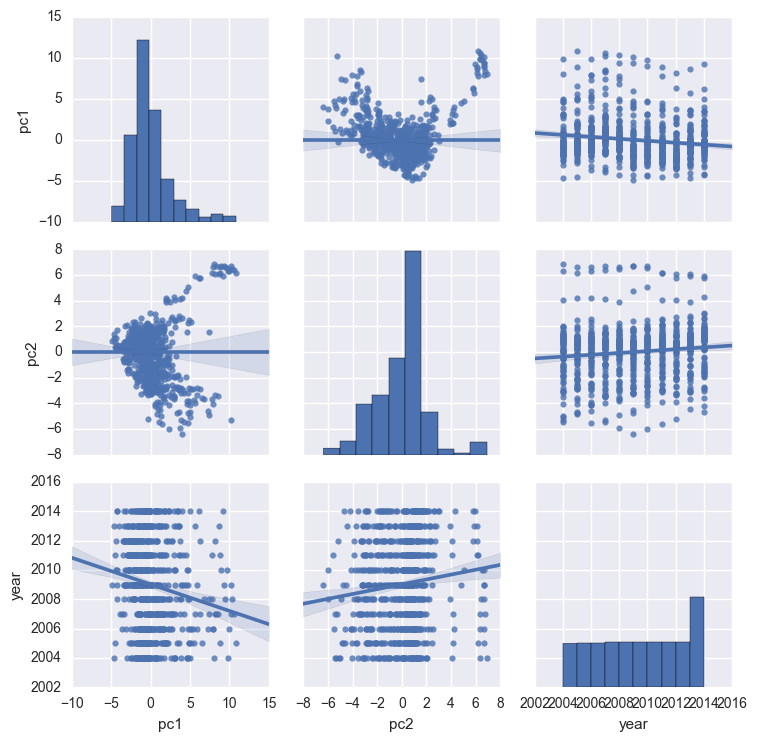

In [25]:
sns.pairplot(df_airports_2, kind='reg')
plt.show()

**What does the graph tell us?** I

In [ ]:
print "It tells us the variance looks similar for both PCA's but PCA looks to have a higher variance."

## Step 8: Cluster with K-Means

Set up the k-means clustering analysis. Use the graph from above to derive "k"

In [26]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Compute the labels and centroids

In [27]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_metrics.silhouette_score(Y_sk, labels, metric='euclidean')


Compute the Silhoutte Score

In [30]:
metrics.silhouette_score(y, labels, metric='euclidean')

0.51899300422271533

Lastly, plot the new two-dimensional data along with their cluster assignments: 

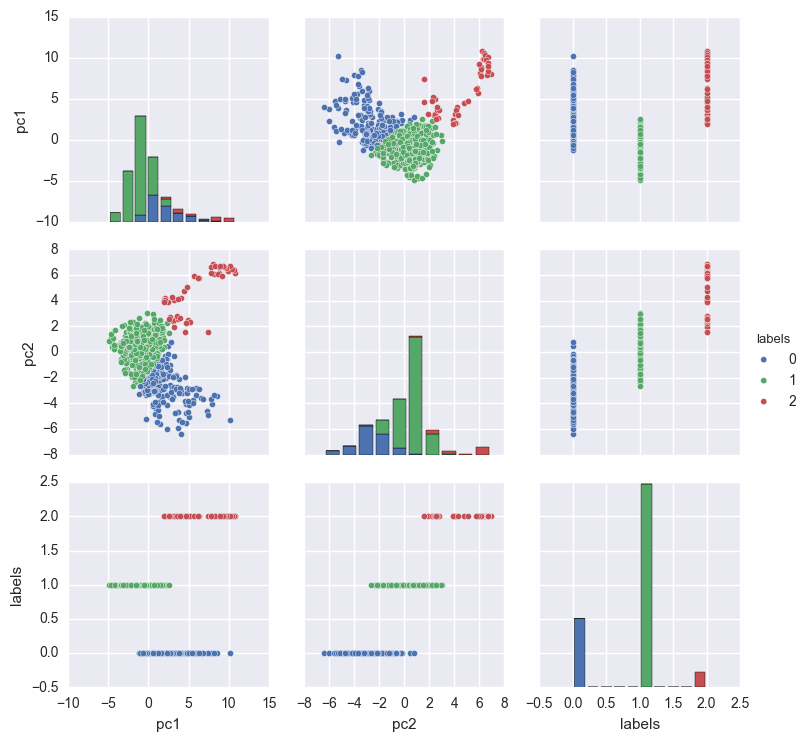

In [29]:
df_cluster = pd.DataFrame(y, columns = ['pc1','pc2'])

df_cluster['labels'] = labels
df_cluster.head()
sns.pairplot(df_cluster, hue = 'labels')